In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from pathlib import Path
import os
from dotenv import load_dotenv

load_dotenv()

allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

cell_exp = boc.get_ophys_experiments(experiment_container_ids=[565039910])
print(len(cell_exp))
data_set = boc.get_ophys_experiment_data(cell_exp[0]['id'])
time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[575003602])


3


In [4]:
cell_exp[0]

{'id': 565293865,
 'imaging_depth': 375,
 'targeted_structure': 'VISpm',
 'cre_line': 'Emx1-IRES-Cre',
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'acquisition_age_days': 145,
 'experiment_container_id': 565039910,
 'session_type': 'three_session_B',
 'donor_name': '276949',
 'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-276949',
 'fail_eye_tracking': True}

In [2]:
print(raw_traces.shape)

(1, 113840)


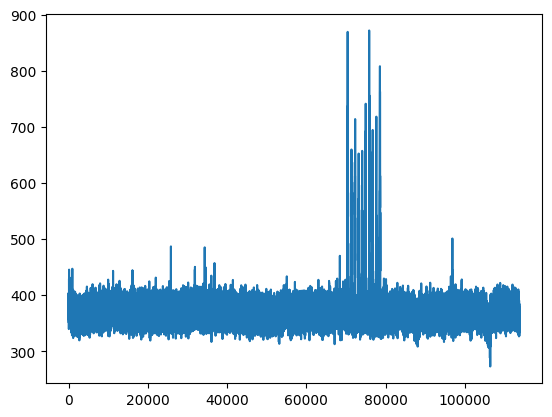

In [3]:
import matplotlib.pyplot as plt

plt.plot(raw_traces[0])

In [9]:
movie_stim_table = data_set.get_stimulus_table('natural_movie_one')

In [11]:
movie_stim_table.head()
start=movie_stim_table['start'].values[0]
end=movie_stim_table['end'].values[-1]

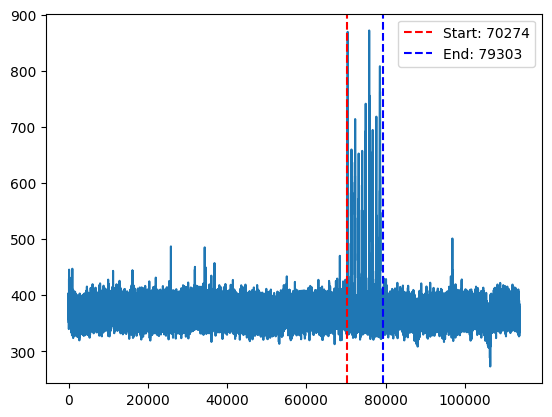

In [12]:

# Plot the data
plt.plot(raw_traces[0])

# Add vertical lines at start and end
plt.axvline(x=start, color='r', linestyle='--', label=f'Start: {start}')
plt.axvline(x=end, color='b', linestyle='--', label=f'End: {end}')

# Optionally, add a legend
plt.legend()

# Display the plot
plt.show()